## Dataset parsing

In [2]:
import geopandas
import pandas as pd

Pavement -- https://data.ccrpc.org/dataset/pavement4

In [3]:
pavement = geopandas.read_file('Pavement.geojson')
# doing some cleaning
pavement = pavement.replace({None: 'Not Specified'})
pavement = pavement.replace({' ': 'Not Specified'})
pavement = pavement.replace({'': 'Not Specified'})
pavement = pavement.replace(r'^\s*$', 'Not Specified', regex=True)

# cleaning for save
pavement = pavement.to_crs(epsg=4326)

lat,long = pavement.centroid.y.values, pavement.centroid.x.values

pavement['Latitude'] = lat
pavement['Longitude'] = long

pavement_cleaned  = pavement.drop('geometry', axis=1)

pavement_cleaned.to_csv('Pavement_cleaned.csv', index=False)

/var/folders/1c/xcwp8_px05xg1_3xd9nn9qhm0000gn/T/ipykernel_2102/2213907011.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lat,long = pavement.centroid.y.values, pavement.centroid.x.values


In [4]:
pavement.head()

,OBJECTID,LegacyID,FACILITYID,BlockStreet,IntersectionStreets,ROW_Mailboxes,Surface_Type,SHAPESTArea,SHAPESTLength,geometry,Latitude,Longitude
0,1,9999,106,600 Ashford Ct,Not Specified,Yes,Concrete,9777.149920,535.412053,"POLYGON ((-88.3098 40.11029, -88.30991 40.1102...",40.109939,-88.309819
1,2,9999,278,4800 Oakdale Dr,Not Specified,Yes,Concrete,2366.207821,231.010281,"POLYGON ((-88.32792 40.10572, -88.32792 40.105...",40.105840,-88.327970
2,3,9999,279,4900 Oakdale Dr,Not Specified,Yes,Concrete,3107.015686,281.007689,"POLYGON ((-88.3281 40.10566, -88.3281 40.10565...",40.105617,-88.328299
3,4,9999,280,Not Specified,Glen Abbey DR & Oakdale Dr,Yes,Concrete,3873.841025,260.746755,"POLYGON ((-88.32792 40.10572, -88.32802 40.105...",40.105615,-88.327963
4,5,9999,281,Not Specified,Oakdale Dr & Vahalla Dr,Yes,Concrete,2725.593128,213.121907,"POLYGON ((-88.32569 40.10547, -88.32569 40.105...",40.105390,-88.325775


In [5]:
pavement_cleaned.columns

Index(['OBJECTID', 'LegacyID', 'FACILITYID', 'BlockStreet',
       'IntersectionStreets', 'ROW_Mailboxes', 'Surface_Type', 'SHAPESTArea',
       'SHAPESTLength', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
pavement_cleaned['LegacyID']

0       9999
1       9999
2       9999
3       9999
4       9999
        ... 
5758    2190
5759    1026
5760    1490
5761     500
5762    0000
Name: LegacyID, Length: 5763, dtype: object

In [7]:
pavement_cleaned['Surface_Type'].unique()

array(['Concrete', 'Asphalt', 'Oil and Chip', 'Not Specified', 'Brick',
       'Gravel'], dtype=object)

<AxesSubplot:>

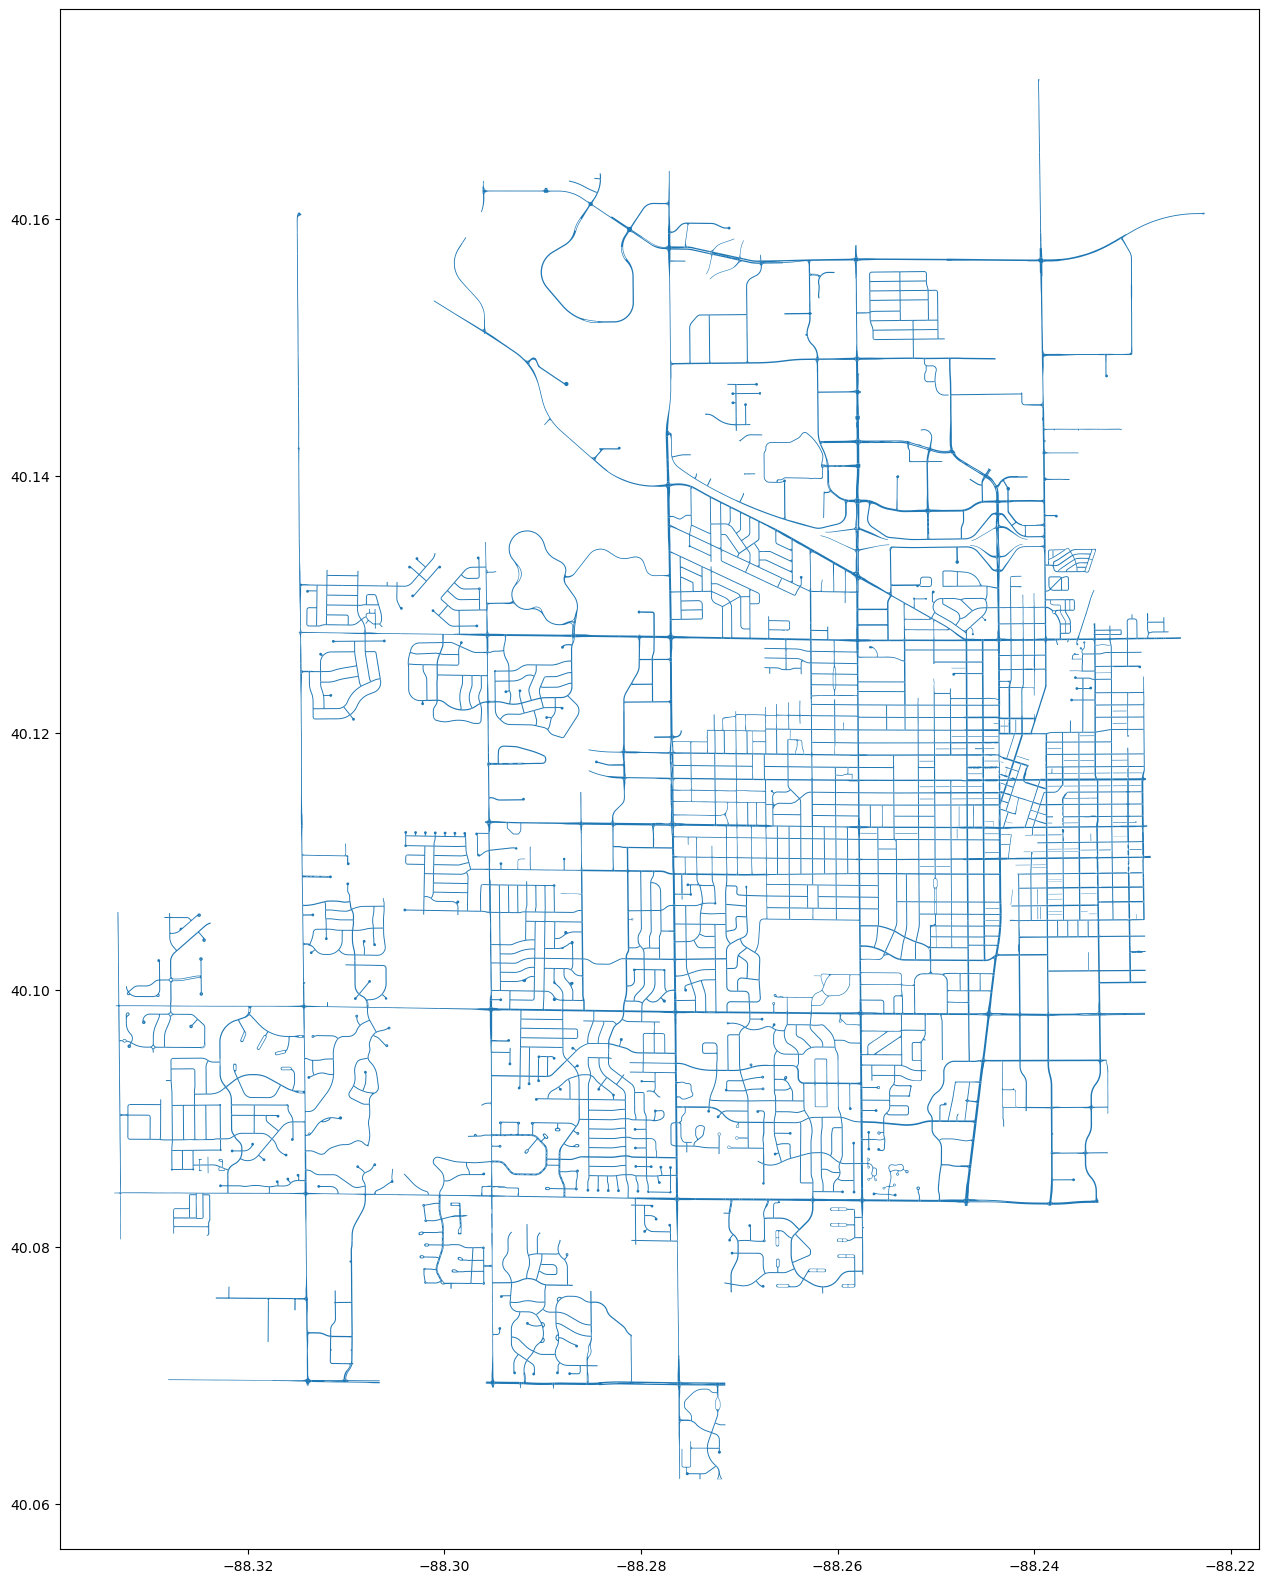

In [8]:
pavement.plot(figsize=(20,20))

## Streetlights

https://data.ccrpc.org/dataset/streetlights4

In [9]:
streetlights = geopandas.read_file('Streetlights.geojson')
#streetlights = pd.read_csv('Streetlights.csv')
# replace
streetlights = streetlights.replace({None: 'Not Specified'})
streetlights = streetlights.replace({' ': 'Not Specified'})
streetlights = streetlights.replace({'': 'Not Specified'})
streetlights = streetlights.replace(r'^\s*$', 'Not Specified', regex=True)

# fix timezone stuff
# 2017-01-01 06:00:00+00:00
#streetlights["InstallDate"] = pd.to_datetime('InstallDate', format = '%Y-%m-%d %H:%M:%S+')
streetlights['InstallDate'] = pd.to_datetime(streetlights['InstallDate'], format='ISO8601', errors='coerce')
streetlights['InstallDate'] = streetlights['InstallDate'].dt.tz_localize(None)


# just to check -- to typical lat/long
streetlights = streetlights.to_crs(epsg=4326)

lat,long = streetlights.centroid.y.values, streetlights.centroid.x.values

streetlights['Latitude'] = lat
streetlights['Longitude'] = long

streetlights_cleaned  = streetlights.drop('geometry', axis=1)

streetlights_cleaned.to_csv('Streetlights_cleaned.csv', index=False)



/var/folders/1c/xcwp8_px05xg1_3xd9nn9qhm0000gn/T/ipykernel_2102/1380902074.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lat,long = streetlights.centroid.y.values, streetlights.centroid.x.values


In [10]:
streetlights.InstallDate

0      2005-01-01 06:00:00
1      2017-01-01 06:00:00
2                      NaT
3                      NaT
4                      NaT
               ...        
4551                   NaT
4552                   NaT
4553                   NaT
4554                   NaT
4555                   NaT
Name: InstallDate, Length: 4556, dtype: datetime64[ns]

In [11]:
streetlights_cleaned.head()

,OBJECTID,Pole_Material,Pole_Arm_Type,Luminaire_Type,Lamp_Type,Lamp_Wattage,Controller_ID,Northing,Easting,Pole_Height,...,Pole_Manufacturer,Lamp_Manufacturer,Decorative,Notes,Location_Adjusted,RepairYear,FieldVerifiedDate,GlobalID,Latitude,Longitude
0,1,Steel,Traffic Signal,Cobra,HPS,250,SL006,1.267212e+06,1.005283e+06,6.0,...,Not Specified,GE,No,Not Specified,AERIAL,Not Specified,Not Specified,{3D9252A0-98F3-41A1-9CE0-8D9AB468C8F5},40.146307,-88.258109
1,2,Aluminum,Truss Arm,Cobra,LED,Not Specified,SL060,1.255993e+06,1.010450e+06,4.0,...,Not Specified,GE,Yes,Not Specified,AERIAL,Not Specified,Not Specified,{3F9D8B79-1F27-427D-86F4-CC5D4472F47D},40.115463,-88.239671
2,3,Cast Aluminum,Other,Globe,IND,85,SL048,1.256266e+06,1.010762e+06,1.0,...,Sternberg,QL,Yes,Not Specified,AERIAL,Not Specified,10/12/18,{A210936D-18C6-43A0-8A43-111608E5E6E9},40.116243,-88.238545
3,4,Aluminum,Combo,Cobra,Other,250/85,SL048,1.256269e+06,1.011333e+06,6.0,...,Not Specified,GE-HPS/QL-IND,Yes,Not Specified,AERIAL,Not Specified,10/12/18,{123E4305-5BB1-4A96-99CD-8A7F7C084441},40.116252,-88.236536
4,5,Cast Iron,Other,Globe,IND,55,SL008,1.257329e+06,1.004594e+06,7.0,...,Not Specified,QL,Yes,Not Specified,AERIAL,Not Specified,Not Specified,{38DA6762-EFE8-45AA-A24E-3753FB014509},40.119176,-88.260596


In [12]:
streetlights_cleaned.columns

Index(['OBJECTID', 'Pole_Material', 'Pole_Arm_Type', 'Luminaire_Type',
       'Lamp_Type', 'Lamp_Wattage', 'Controller_ID', 'Northing', 'Easting',
       'Pole_Height', 'InstallDate', 'FACILITYID', 'Receptacle',
       'ControllerCircuit', 'Pole_Color', 'Pole_Manufacturer',
       'Lamp_Manufacturer', 'Decorative', 'Notes', 'Location_Adjusted',
       'RepairYear', 'FieldVerifiedDate', 'GlobalID', 'Latitude', 'Longitude'],
      dtype='object')

In [13]:
streetlights_cleaned['Pole_Material'].unique()

array(['Steel', 'Aluminum', 'Cast Aluminum', 'Cast Iron', 'Concrete',
       'Wood', 'Fiberglass', 'Other', 'Not Specified'], dtype=object)

In [14]:
streetlights_cleaned['Luminaire_Type'].unique()

array(['Cobra', 'Globe', 'Teardrop', 'Not Specified', 'Teardrop/Teardrop',
       'Other', 'Cobra/Globe', 'Cobra/Teardrop', 'Tear Drop', 'Acorn'],
      dtype=object)

In [15]:
streetlights_cleaned['Lamp_Type'].unique()

array(['HPS', 'LED', 'IND', 'Other', 'Not Specified', 'HPS/Induction',
       'HPS/Incand.', 'Mercury Vapor'], dtype=object)

In [16]:
streetlights_cleaned['Lamp_Wattage'].unique()

array(['250', 'Not Specified', '85', '250/85', '55', '100', '150',
       '250/100', '286(LED)', '70', '400/85', '400', '66 (LED)',
       '150/100', '286(LED)/66(LED)', '286(LED)/85', '175', '99(LED)',
       '18(LED)', '10(LED)'], dtype=object)

<AxesSubplot:>

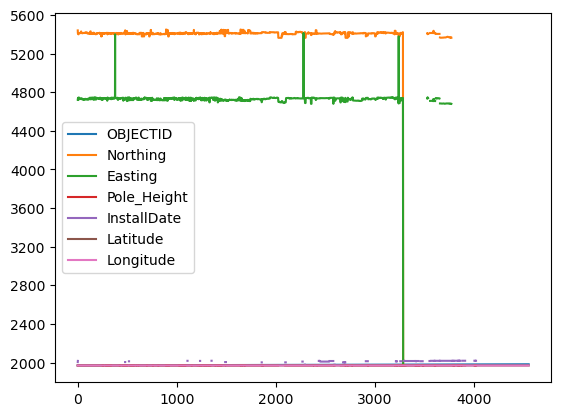

In [17]:
streetlights_cleaned.plot()

<AxesSubplot:ylabel='count'>

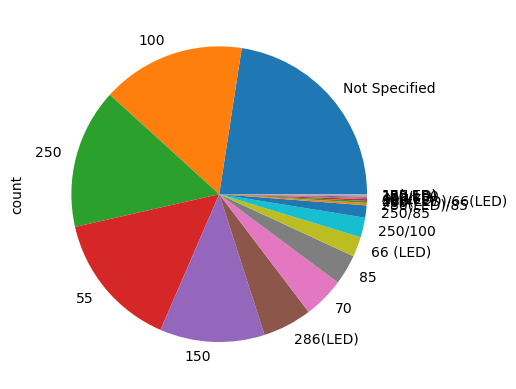

In [18]:
streetlights_cleaned['Lamp_Wattage'].value_counts().plot(kind='pie')

## Combined pavement & streetlights

In [19]:
with pd.ExcelWriter('Streetlights_and_Pavement_combined_data.xlsx') as writer:
    # Write df1 to 'Sheet1'
    streetlights_cleaned.to_excel(writer, sheet_name='Streetlights', index=False)
    # Write df2 to 'Sheet2'
    pavement_cleaned.to_excel(writer, sheet_name='Pavement', index=False)

In [20]:
streetlights_cleaned.columns

Index(['OBJECTID', 'Pole_Material', 'Pole_Arm_Type', 'Luminaire_Type',
       'Lamp_Type', 'Lamp_Wattage', 'Controller_ID', 'Northing', 'Easting',
       'Pole_Height', 'InstallDate', 'FACILITYID', 'Receptacle',
       'ControllerCircuit', 'Pole_Color', 'Pole_Manufacturer',
       'Lamp_Manufacturer', 'Decorative', 'Notes', 'Location_Adjusted',
       'RepairYear', 'FieldVerifiedDate', 'GlobalID', 'Latitude', 'Longitude'],
      dtype='object')

In [21]:
streetlights_cleaned.InstallDate

0      2005-01-01 06:00:00
1      2017-01-01 06:00:00
2                      NaT
3                      NaT
4                      NaT
               ...        
4551                   NaT
4552                   NaT
4553                   NaT
4554                   NaT
4555                   NaT
Name: InstallDate, Length: 4556, dtype: datetime64[ns]

## Traffic Signs

In [22]:
signs = geopandas.read_file('Traffic_Signs.geojson')
# replace
signs = signs.replace({None: 'Not Specified'})
signs = signs.replace({' ': 'Not Specified'})
signs = signs.replace({'': 'Not Specified'})
signs = signs.replace(r'^\s*$', 'Not Specified', regex=True)

# fix timezone stuff
# 2017-01-01 06:00:00+00:00
#streetlights["InstallDate"] = pd.to_datetime('InstallDate', format = '%Y-%m-%d %H:%M:%S+')
signs['Year_Insta'] = pd.to_datetime(signs['Year_Insta'], format='%Y', errors='coerce')
signs['Year_Insta'] = signs['Year_Insta'].dt.tz_localize(None)


# just to check -- to typical lat/long
signs = signs.to_crs(epsg=4326)

lat,long = signs.centroid.y.values, signs.centroid.x.values

signs['Latitude'] = lat
signs['Longitude'] = long

signs_cleaned  = signs.drop('geometry', axis=1)

signs_cleaned.to_csv('Traffic_Signs_cleaned.csv', index=False)

/var/folders/1c/xcwp8_px05xg1_3xd9nn9qhm0000gn/T/ipykernel_2102/25236682.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lat,long = signs.centroid.y.values, signs.centroid.x.values


<AxesSubplot:>

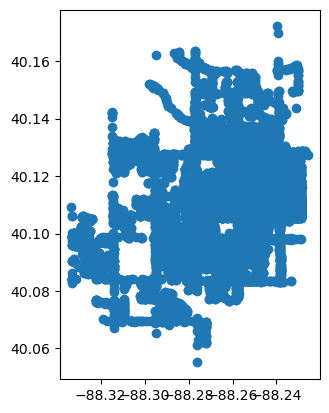

In [23]:
signs.plot()

In [24]:
signs.columns

Index(['OBJECTID', 'Sign_Type', 'Size_', 'Supplement', 'Sign_Post',
       'Year_Insta', 'Category', 'Notes', 'MUTCD', 'Ownership', 'FACILITYID',
       'Schools', 'Location_Adjusted', 'Replacement_Zone', 'Sign_Text',
       'Set_ID', 'FieldVerifiedDate', 'GlobalID', 'geometry', 'Latitude',
       'Longitude'],
      dtype='object')

In [25]:
signs['Year_Insta']

0              NaT
1              NaT
2       2010-01-01
3       2010-01-01
4       2010-01-01
           ...    
15559   2024-01-01
15560   2024-01-01
15561   2024-01-01
15562   2024-01-01
15563          NaT
Name: Year_Insta, Length: 15564, dtype: datetime64[ns]